**Upload Retail Data from Github
Features include: BillNo, Itemname, Quantity, Date, Price, Customer, and Country**

In [2]:
#Import packages
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#IF USING COLLAB uncomment
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#Load in Data
file_path = 'Data/Assignment-1_Data.xlsx'
df = pd.read_excel(file_path)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data Exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [7]:
df.describe()

,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


**Variable adjustments, convert Itemname and Country into categorical variables, and convert the date variable to a usable form**

In [9]:
#Convert Item Name into Categorical Variable
df['Itemname'].value_counts()
print(df['Itemname'].head())

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Itemname, dtype: object


In [10]:
#Convert Country into Categorical Variable
df['Country'].value_counts()
print(df['Country'].head())

0    United Kingdom
1    United Kingdom
2    United Kingdom
3    United Kingdom
4    United Kingdom
Name: Country, dtype: object


In [11]:
#Convert Date Variable to be only the day
df['Date'] = pd.to_datetime(df['Date'])
df['DateOnly'] = df['Date'].dt.date
print(df['DateOnly'].head())

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: DateOnly, dtype: object


In [12]:
#Make Is Weekday variable
df['is_weekday'] = df['Date'].dt.weekday < 5
df['is_weekday'] = df['is_weekday'].astype(int) #convert boolean so instead of true/false you get 1/0
print(df['is_weekday'].head())

0    1
1    1
2    1
3    1
4    1
Name: is_weekday, dtype: int32


In [13]:
#Make Dependent Variable - Revenue per day
df['Revenue'] = df['Price'] * df['Quantity']                           #revenue per transaction
daily_revenue = df.groupby('DateOnly')['Revenue'].sum().reset_index()  #Group by day
daily_revenue.columns = ['DateOnly', 'Daily_Revenue']
print(daily_revenue.head())


     DateOnly  Daily_Revenue
0  2010-12-01       58405.41
1  2010-12-02       47725.88
2  2010-12-03       44366.86
3  2010-12-05       31774.95
4  2010-12-06       53647.96


In [14]:
#Make Daily Quantity Variable
daily_quantity = df.groupby('DateOnly')['Quantity'].sum().reset_index()
daily_quantity.columns = ['DateOnly', 'Daily_Quantity']
print(df.columns)

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'DateOnly', 'is_weekday', 'Revenue'],
      dtype='object')


In [15]:
print(daily_quantity.head())

     DateOnly  Daily_Quantity
0  2010-12-01           26754
1  2010-12-02           31304
2  2010-12-03           12546
3  2010-12-05           16451
4  2010-12-06           21104


In [16]:
print(df.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country    DateOnly  is_weekday  Revenue  
0   2.55     17850.0  United Kingdom  2010-12-01           1    15.30  
1   3.39     17850.0  United Kingdom  2010-12-01           1    20.34  
2   2.75     17850.0  United Kingdom  2010-12-01           1    22.00  
3   3.39     17850.0  United Kingdom  2010-12-01           1    20.34  
4   3.39     17850.0  United Kingdom  2010-12-01           1    20.34  


In [17]:
#Merge two new variables with original dataset
df = df.merge(daily_revenue, on='DateOnly', how='left')
df = df.merge(daily_quantity, on='DateOnly', how='left')
print(df.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country    DateOnly  is_weekday  Revenue  \
0   2.55     17850.0  United Kingdom  2010-12-01           1    15.30   
1   3.39     17850.0  United Kingdom  2010-12-01           1    20.34   
2   2.75     17850.0  United Kingdom  2010-12-01           1    22.00   
3   3.39     17850.0  United Kingdom  2010-12-01           1    20.34   
4   3.39     17850.0  United Kingdom  2010-12-01           1    20.34   

   Daily_Revenue  Daily_Quantity  
0       58405.41           26754  
1       58

### Load Additional Gas & CPI Feature Data

In [19]:
#Weekly Gas Prices
gas_df = pd.read_csv('Data/Gas_Prices.csv')
gas_df.head()

,Date,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,"Apr 05, 1993",1.068
1,"Apr 12, 1993",1.079
2,"Apr 19, 1993",1.079
3,"Apr 26, 1993",1.086
4,"May 03, 1993",1.086


In [20]:
#Monthly Consumer Price Index (CPI)
cpi_df = pd.read_csv('Data/CPI_data.csv')
cpi_df.head()

,Date,CPI
0,1/1/2010,2.6
1,2/1/2010,2.1
2,3/1/2010,2.3
3,4/1/2010,2.2
4,5/1/2010,2.0


In [21]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    36 non-null     object 
 1   CPI     36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [22]:
# Ensure date columns are in datetime format
df['Date'] = pd.to_datetime(df['Date'])
gas_df['Date'] = pd.to_datetime(gas_df['Date'])

# Check the columns of gas_df to identify the correct column name for gas prices
print(gas_df.columns)

# Rename the gas price column based on the exact column name in gas_df
gas_df.rename(columns={'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)': 'Gas_Price'}, inplace=True)

Index(['Date', 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'], dtype='object')


In [23]:
gas_df

,Date,Gas_Price
0,1993-04-05,1.068
1,1993-04-12,1.079
2,1993-04-19,1.079
3,1993-04-26,1.086
4,1993-05-03,1.086
...,...,...
1645,2024-10-14,3.294
1646,2024-10-21,3.268
1647,2024-10-28,3.220
1648,2024-11-04,3.191


In [24]:
# Ensure only date parts are in 'Date' columns for both dataframes
df['Date'] = pd.to_datetime(df['Date']).dt.date
gas_df['Date'] = pd.to_datetime(gas_df['Date']).dt.date

# Convert 'Date' back to datetime format for both dataframes for consistent merging
df['Date'] = pd.to_datetime(df['Date'])
gas_df['Date'] = pd.to_datetime(gas_df['Date'])

# Perform the merge on 'Date' and fill missing values for gas prices
df = df.merge(gas_df[['Date', 'Gas_Price']], how='left', on='Date')

# Use forward fill and backward fill to handle any remaining NaN values in Gas_Price
df['Gas_Price'] = df['Gas_Price'].ffill().bfill()

# Display the result to verify
print(df.head())

   BillNo                             Itemname  Quantity       Date  Price  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01   2.55   
1  536365                  WHITE METAL LANTERN         6 2010-12-01   3.39   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01   2.75   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01   3.39   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01   3.39   

   CustomerID         Country    DateOnly  is_weekday  Revenue  Daily_Revenue  \
0     17850.0  United Kingdom  2010-12-01           1    15.30       58405.41   
1     17850.0  United Kingdom  2010-12-01           1    20.34       58405.41   
2     17850.0  United Kingdom  2010-12-01           1    22.00       58405.41   
3     17850.0  United Kingdom  2010-12-01           1    20.34       58405.41   
4     17850.0  United Kingdom  2010-12-01           1    20.34       58405.41   

   Daily_Quantity  Gas_Price  
0           2

In [25]:
# Ensure the 'Date' columns in df and cpi_df are in datetime format
df['Date'] = pd.to_datetime(df['Date']).dt.date
cpi_df['Date'] = pd.to_datetime(cpi_df['Date']).dt.date

# Convert back to datetime format for merging
df['Date'] = pd.to_datetime(df['Date'])
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])

# Sort cpi_df by Date to prepare for an asof merge or forward fill
cpi_df = cpi_df.sort_values('Date')

# Perform an asof merge to get the closest previous CPI for each date in df
df = pd.merge_asof(df.sort_values('Date'), cpi_df[['Date', 'CPI']], on='Date', direction='backward')

# Display the result to verify
print(df.head())

   BillNo                            Itemname  Quantity       Date  Price  \
0  536365  WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01   2.55   
1  536557               BEACH HUT KEY CABINET         1 2010-12-01   3.75   
2  536557             HOME SMALL WOOD LETTERS         1 2010-12-01   4.95   
3  536557     SET OF 3 BABUSHKA STACKING TINS         1 2010-12-01   4.95   
4  536557      SMALL PURPLE BABUSHKA NOTEBOOK        11 2010-12-01   0.85   

   CustomerID         Country    DateOnly  is_weekday  Revenue  Daily_Revenue  \
0     17850.0  United Kingdom  2010-12-01           1    15.30       58405.41   
1     17841.0  United Kingdom  2010-12-01           1     3.75       58405.41   
2     17841.0  United Kingdom  2010-12-01           1     4.95       58405.41   
3     17841.0  United Kingdom  2010-12-01           1     4.95       58405.41   
4     17841.0  United Kingdom  2010-12-01           1     9.35       58405.41   

   Daily_Quantity  Gas_Price  CPI  
0           26

**Rename df with addtional features**

In [27]:
df_ft = df

In [28]:
df_ft

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,DateOnly,is_weekday,Revenue,Daily_Revenue,Daily_Quantity,Gas_Price,CPI
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,1,15.30,58405.41,26754,3.013,1.5
1,536557,BEACH HUT KEY CABINET,1,2010-12-01,3.75,17841.0,United Kingdom,2010-12-01,1,3.75,58405.41,26754,3.013,1.5
2,536557,HOME SMALL WOOD LETTERS,1,2010-12-01,4.95,17841.0,United Kingdom,2010-12-01,1,4.95,58405.41,26754,3.013,1.5
3,536557,SET OF 3 BABUSHKA STACKING TINS,1,2010-12-01,4.95,17841.0,United Kingdom,2010-12-01,1,4.95,58405.41,26754,3.013,1.5
4,536557,SMALL PURPLE BABUSHKA NOTEBOOK,11,2010-12-01,0.85,17841.0,United Kingdom,2010-12-01,1,9.35,58405.41,26754,3.013,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,581492,GLASS JAR DAISY FRESH COTTON WOOL,2,2011-12-09,5.79,NaN,United Kingdom,2011-12-09,1,11.58,200920.60,93979,3.350,3.0
522060,581492,KINGS CHOICE TEA CADDY,1,2011-12-09,5.79,NaN,United Kingdom,2011-12-09,1,5.79,200920.60,93979,3.350,3.0
522061,581492,KINGS CHOICE BISCUIT TIN,2,2011-12-09,4.13,NaN,United Kingdom,2011-12-09,1,8.26,200920.60,93979,3.350,3.0
522062,581492,SET/4 RED MINI ROSE CANDLE IN BOWL,5,2011-12-09,1.63,NaN,United Kingdom,2011-12-09,1,8.15,200920.60,93979,3.350,3.0


**The data on 09 December 2011 is a clear outlier, probably captures data beyond the actual date since it is the last date. We will remove this data for the purposes of our model**

C:\Users\mothe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mothe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


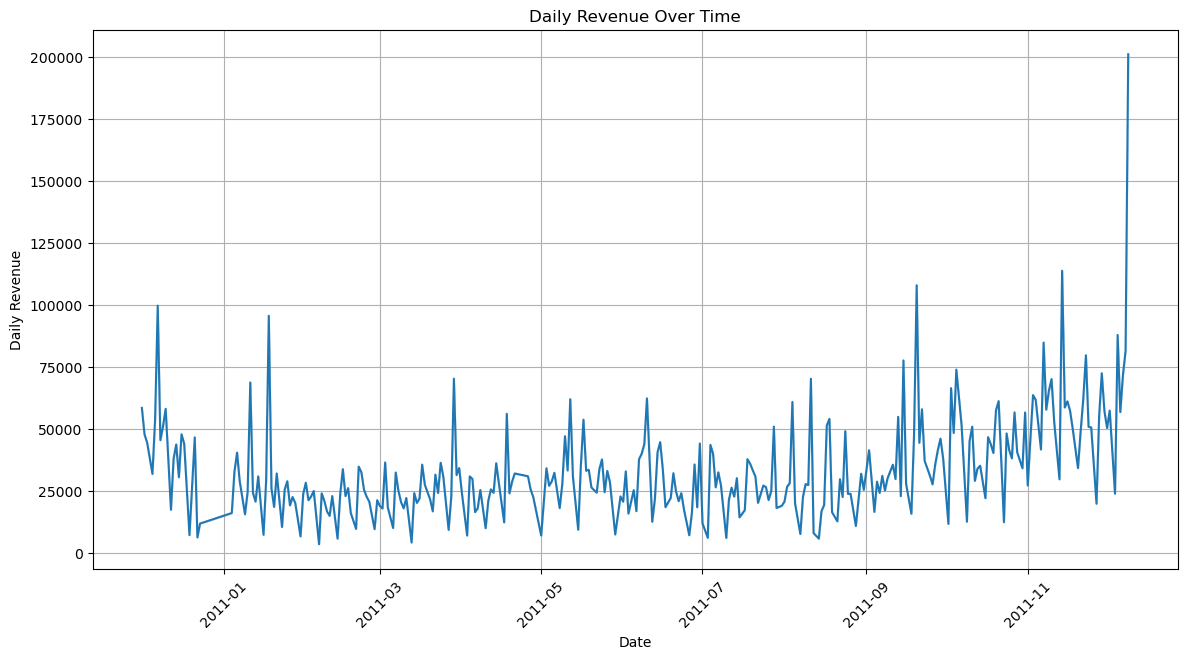

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'DateOnly' is the date column and 'Daily_Revenue' is the revenue column
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_ft, x="DateOnly", y="Daily_Revenue")
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
# Dropping rows with date of 12 December 2009
df_ft = df_ft[df_ft['Date'] != '2011-12-09']

# Confirm the result by displaying the first few rows
df_ft

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,DateOnly,is_weekday,Revenue,Daily_Revenue,Daily_Quantity,Gas_Price,CPI
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,1,15.30,58405.41,26754,3.013,1.5
1,536557,BEACH HUT KEY CABINET,1,2010-12-01,3.75,17841.0,United Kingdom,2010-12-01,1,3.75,58405.41,26754,3.013,1.5
2,536557,HOME SMALL WOOD LETTERS,1,2010-12-01,4.95,17841.0,United Kingdom,2010-12-01,1,4.95,58405.41,26754,3.013,1.5
3,536557,SET OF 3 BABUSHKA STACKING TINS,1,2010-12-01,4.95,17841.0,United Kingdom,2010-12-01,1,4.95,58405.41,26754,3.013,1.5
4,536557,SMALL PURPLE BABUSHKA NOTEBOOK,11,2010-12-01,0.85,17841.0,United Kingdom,2010-12-01,1,9.35,58405.41,26754,3.013,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520434,581230,ROBOT BIRTHDAY CARD,12,2011-12-08,0.42,14291.0,United Kingdom,2011-12-08,1,5.04,81410.86,34293,3.350,3.0
520435,581230,PAPER BUNTING RETROSPOT,12,2011-12-08,2.95,14291.0,United Kingdom,2011-12-08,1,35.40,81410.86,34293,3.350,3.0
520436,581230,LUNCH BAG DOLLY GIRL DESIGN,10,2011-12-08,1.65,14291.0,United Kingdom,2011-12-08,1,16.50,81410.86,34293,3.350,3.0
520437,581230,TEA PARTY BIRTHDAY CARD,12,2011-12-08,0.42,14291.0,United Kingdom,2011-12-08,1,5.04,81410.86,34293,3.350,3.0


In [32]:
# Keep only the necessary columns
df_ft = df_ft[['Date', 'is_weekday', 'Gas_Price', 'CPI', 'Daily_Revenue']]

# Drop duplicate rows based on the columns you're using for regression
df_ft = df_ft.drop_duplicates()

# Confirm the result by displaying the first few rows
print("Data after dropping duplicates:")
print(df_ft.head())

Data after dropping duplicates:
           Date  is_weekday  Gas_Price  CPI  Daily_Revenue
0    2010-12-01           1      3.013  1.5       58405.41
3061 2010-12-02           1      3.013  1.5       47725.88
5125 2010-12-03           1      3.013  1.5       44366.86
7228 2010-12-05           0      3.013  1.5       31774.95
9937 2010-12-06           1      3.013  1.5       53647.96


**Creating features for revenue from 1 week and 2 weeks ago**

In [34]:
# Ensure 'Date' is set as the index and has a continuous date range
df_ft['Date'] = pd.to_datetime(df_ft['Date'])
df_ft = df_ft.set_index('Date').asfreq('D')  # Reindex with a daily frequency

# Create 14-day and 7-day lagged revenue columns based on actual dates
df_ft['Daily_Revenue_Lag14'] = df_ft['Daily_Revenue'].shift(14)
df_ft['Daily_Revenue_Lag7'] = df_ft['Daily_Revenue'].shift(7)

# Forward fill only the lagged columns
df_ft['Daily_Revenue_Lag14'] = df_ft['Daily_Revenue_Lag14'].fillna(method='ffill')
df_ft['Daily_Revenue_Lag7'] = df_ft['Daily_Revenue_Lag7'].fillna(method='ffill')

# Reset the index if needed
df_ft = df_ft.reset_index()

# Display the first few rows to confirm
print(df_ft.head(20))


         Date  is_weekday  Gas_Price  CPI  Daily_Revenue  Daily_Revenue_Lag14  \
0  2010-12-01         1.0      3.013  1.5       58405.41                  NaN   
1  2010-12-02         1.0      3.013  1.5       47725.88                  NaN   
2  2010-12-03         1.0      3.013  1.5       44366.86                  NaN   
3  2010-12-04         NaN        NaN  NaN            NaN                  NaN   
4  2010-12-05         0.0      3.013  1.5       31774.95                  NaN   
5  2010-12-06         1.0      3.013  1.5       53647.96                  NaN   
6  2010-12-07         1.0      3.013  1.5       99618.20                  NaN   
7  2010-12-08         1.0      3.013  1.5       45389.98                  NaN   
8  2010-12-09         1.0      3.013  1.5       50995.60                  NaN   
9  2010-12-10         1.0      3.013  1.5       58026.87                  NaN   
10 2010-12-11         NaN        NaN  NaN            NaN                  NaN   
11 2010-12-12         0.0   

C:\Users\mothe\AppData\Local\Temp\ipykernel_5632\3978092070.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ft['Daily_Revenue_Lag14'] = df_ft['Daily_Revenue_Lag14'].fillna(method='ffill')
C:\Users\mothe\AppData\Local\Temp\ipykernel_5632\3978092070.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ft['Daily_Revenue_Lag7'] = df_ft['Daily_Revenue_Lag7'].fillna(method='ffill')


In [35]:
df_ft['Date'] = pd.to_datetime(df_ft['Date'])

# Drop rows where DateOnly is between '2010-12-01' and '2010-12-14'
df_ft = df_ft[~((df_ft['Date'] >= '2010-12-01') & (df_ft['Date'] <= '2010-12-17'))]

# Display the first few rows to confirm
pd.set_option('display.max_rows', 100)
df_ft.head()

,Date,is_weekday,Gas_Price,CPI,Daily_Revenue,Daily_Revenue_Lag14,Daily_Revenue_Lag7
17,2010-12-18,NaN,NaN,NaN,NaN,44366.86,58026.87
18,2010-12-19,0.0,3.035,1.5,7123.81,31774.95,17329.07
19,2010-12-20,1.0,3.037,1.5,26789.13,53647.96,38006.71
20,2010-12-21,1.0,3.037,1.5,46541.79,99618.20,43663.91
21,2010-12-22,1.0,3.037,1.5,6199.97,45389.98,30444.62


In [36]:
#Add a day count (essentially the timeseries)
df_ft['day_count'] = (df_ft['Date'] - df_ft['Date'].min()).dt.days + 1

**One hot encoding weekdays - Note: there is no Sunday data, that's why Day_5 is skipped**

In [38]:
# Assuming your DataFrame is named 'df_ft' and has a 'Date' column in datetime format
df_ft['Date'] = pd.to_datetime(df_ft['Date'])

# Extract the day of the week (0=Monday, 5=Saturday, excluding Sunday)
df_ft['day_of_week'] = df_ft['Date'].dt.dayofweek

# Ensure only the days with data (0=Monday to 5=Saturday) are represented
df_ft['day_of_week'] = pd.Categorical(df_ft['day_of_week'], categories=[0, 1, 2, 3, 4, 6])

# One-hot encode the day of the week, dropping the first category (e.g., Monday as reference)
df_ft = pd.get_dummies(df_ft, columns=['day_of_week'], prefix='day', dtype=int, drop_first=True)

# Display the DataFrame with the new one-hot encoded columns
print(df_ft.head())

         Date  is_weekday  Gas_Price  CPI  Daily_Revenue  Daily_Revenue_Lag14  \
17 2010-12-18         NaN        NaN  NaN            NaN             44366.86   
18 2010-12-19         0.0      3.035  1.5        7123.81             31774.95   
19 2010-12-20         1.0      3.037  1.5       26789.13             53647.96   
20 2010-12-21         1.0      3.037  1.5       46541.79             99618.20   
21 2010-12-22         1.0      3.037  1.5        6199.97             45389.98   

    Daily_Revenue_Lag7  day_count  day_1  day_2  day_3  day_4  day_6  
17            58026.87          1      0      0      0      0      0  
18            17329.07          2      0      0      0      0      1  
19            38006.71          3      0      0      0      0      0  
20            43663.91          4      1      0      0      0      0  
21            30444.62          5      0      1      0      0      0  


In [39]:
# Drop rows where Daily_Revenue is NaN
df_ft = df_ft.dropna(subset=['Daily_Revenue'])
df_ft.head(20)

,Date,is_weekday,Gas_Price,CPI,Daily_Revenue,Daily_Revenue_Lag14,Daily_Revenue_Lag7,day_count,day_1,day_2,day_3,day_4,day_6
18,2010-12-19,0.0,3.035,1.5,7123.81,31774.95,17329.07,2,0,0,0,0,1
19,2010-12-20,1.0,3.037,1.5,26789.13,53647.96,38006.71,3,0,0,0,0,0
20,2010-12-21,1.0,3.037,1.5,46541.79,99618.20,43663.91,4,1,0,0,0,0
21,2010-12-22,1.0,3.037,1.5,6199.97,45389.98,30444.62,5,0,1,0,0,0
22,2010-12-23,1.0,3.037,1.5,11786.26,50995.60,47753.04,6,0,0,1,0,0
34,2011-01-04,1.0,3.037,1.6,16026.08,46541.79,11786.26,18,1,0,0,0,0
35,2011-01-05,1.0,3.037,1.6,32634.47,6199.97,11786.26,19,0,1,0,0,0
36,2011-01-06,1.0,3.037,1.6,40382.85,11786.26,11786.26,20,0,0,1,0,0
37,2011-01-07,1.0,3.037,1.6,28836.59,11786.26,11786.26,21,0,0,0,1,0
39,2011-01-09,0.0,3.037,1.6,15520.20,11786.26,11786.26,23,0,0,0,0,1


**End of Data Prep - and Start of Data Visualization**

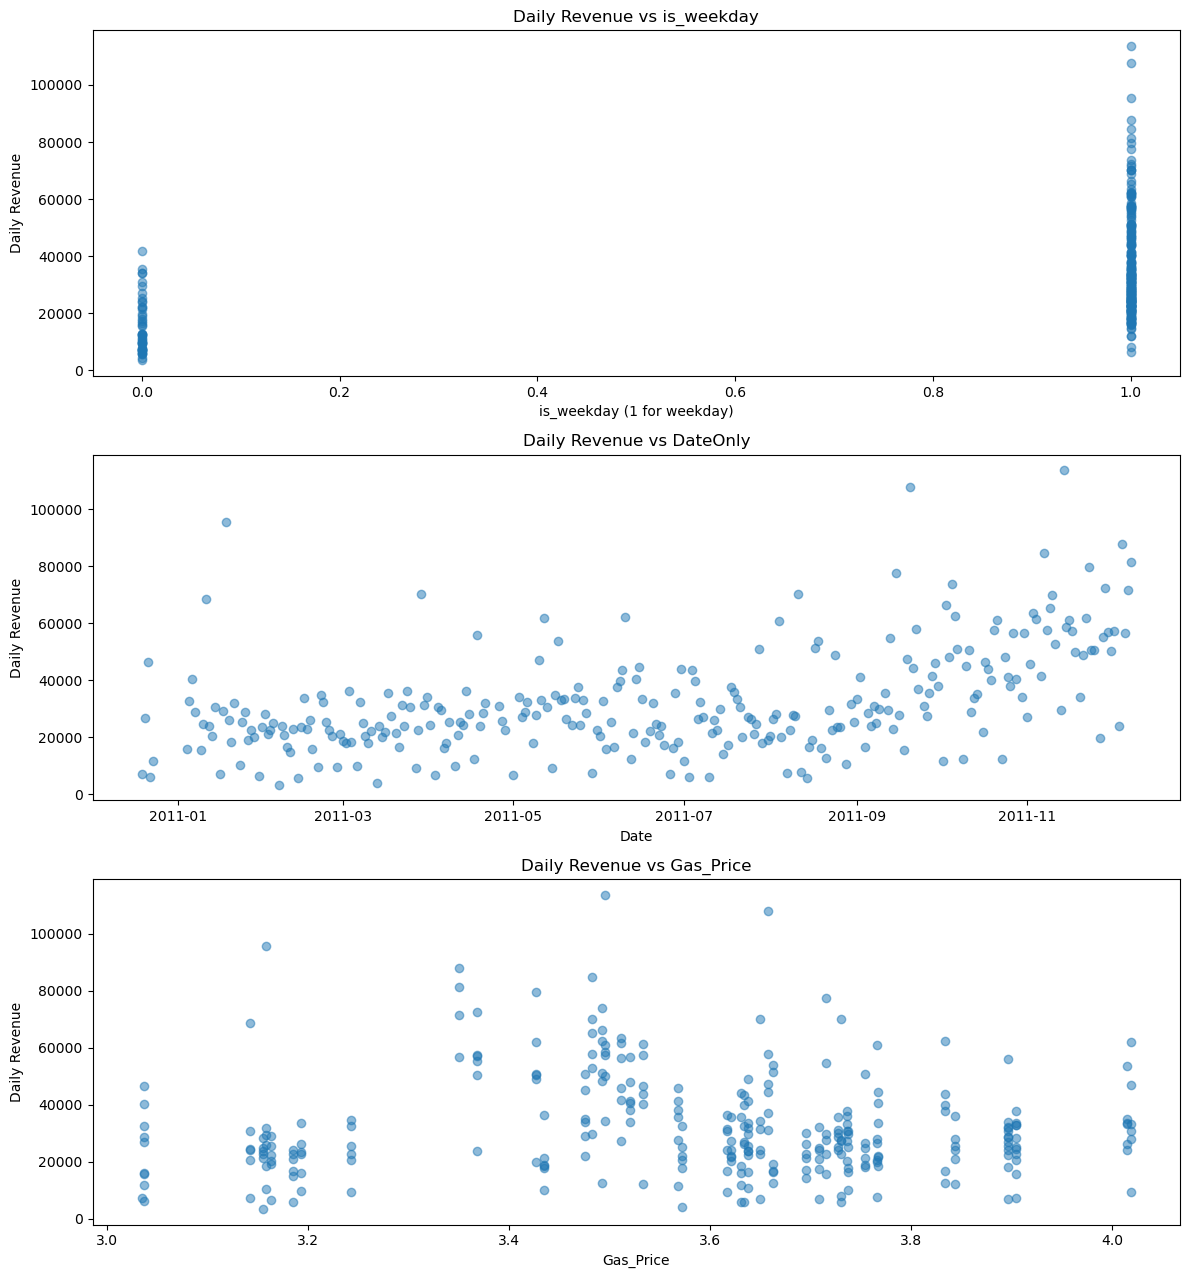

In [41]:
import matplotlib.pyplot as plt

# Additional plots for Gas_Price, CPI, and Daily_Revenue_Lag14 with DateOnly on the x-axis
fig, ax = plt.subplots(3, 1, figsize=(12, 14))

# Plot 1: Daily Revenue vs is_weekday
ax[0].scatter(df_ft['is_weekday'], df_ft['Daily_Revenue'], alpha=0.5)
ax[0].set_title('Daily Revenue vs is_weekday')
ax[0].set_xlabel('is_weekday (1 for weekday)')
ax[0].set_ylabel('Daily Revenue')

# Plot 2: Daily Revenue vs CPI
ax[1].scatter(df_ft['Date'], df_ft['Daily_Revenue'], alpha=0.5)
ax[1].set_title('Daily Revenue vs DateOnly')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Revenue')

# Plot 3: Daily Revenue vs Gas_Price
ax[2].scatter(df_ft['Gas_Price'], df_ft['Daily_Revenue'], alpha=0.5)
ax[2].set_title('Daily Revenue vs Gas_Price')
ax[2].set_xlabel('Gas_Price')
ax[2].set_ylabel('Daily Revenue')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


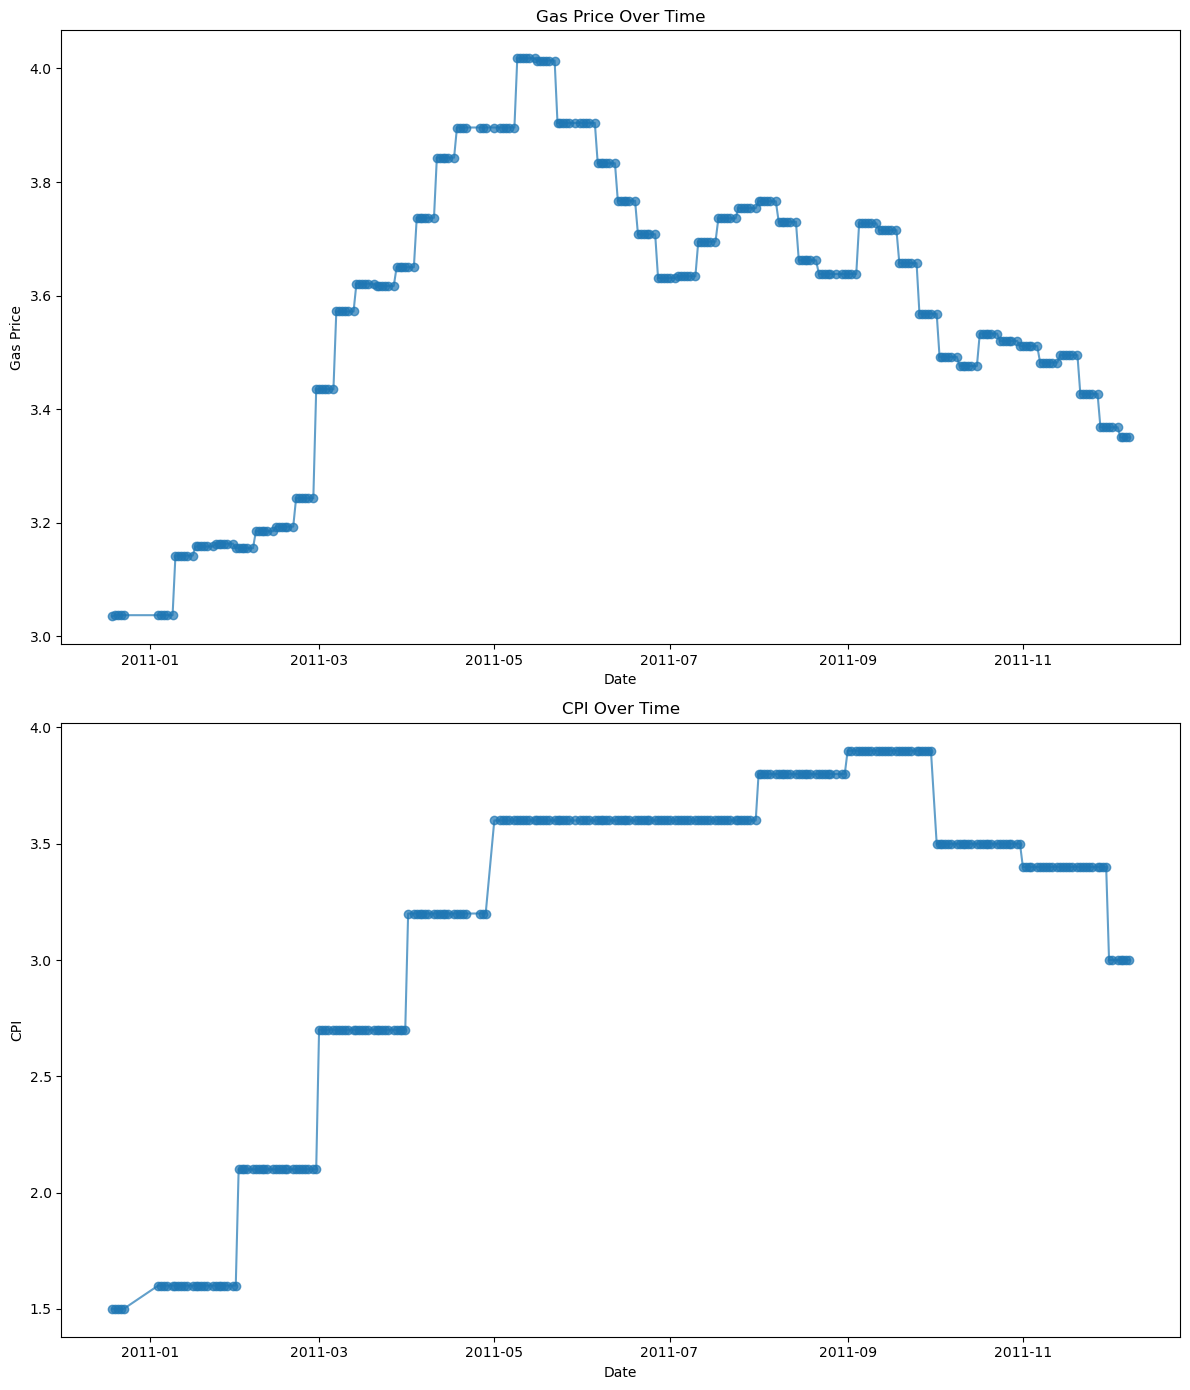

In [42]:
# Additional plots for Gas_Price, CPI, and Daily_Revenue_Lag14 with DateOnly on the x-axis
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Plot for Gas_Price
ax[0].plot(df_ft['Date'], df_ft['Gas_Price'], marker='o', linestyle='-', alpha=0.7)
ax[0].set_title('Gas Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Gas Price')

# Plot for CPI
ax[1].plot(df_ft['Date'], df_ft['CPI'], marker='o', linestyle='-', alpha=0.7)
ax[1].set_title('CPI Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('CPI')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [43]:
# Define the cutoff date
cutoff_date = '2011-11-01'

# Split the data
train_df = df_ft[df_ft['Date'] < cutoff_date]
test_df = df_ft[df_ft['Date'] >= cutoff_date]

# Separate features and target in each set if needed
x_train = train_df.drop(columns=['Daily_Revenue','Date'])
y_train = train_df['Daily_Revenue']

x_test = test_df.drop(columns=['Daily_Revenue','Date'])
y_test = test_df['Daily_Revenue']

# Verify the shapes
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_test.shape, y_test.shape)

Training set: (256, 11) (256,)
Validation set: (33, 11) (33,)


**Build a linear regression model - 2 BEST MODEL**

Removing is_weekday due to high VIF

In [45]:
# Define cutoff date
cutoff_date = '2011-11-01'

# Split the data
train_df_ft = df_ft[df_ft['Date'] < cutoff_date]
test_df_ft = df_ft[df_ft['Date'] >= cutoff_date]

# Separate features and target
x_train = train_df_ft.drop(columns=['Daily_Revenue', 'Date', 'is_weekday'])
y_train = train_df_ft['Daily_Revenue']
x_test = test_df_ft.drop(columns=['Daily_Revenue', 'Date', 'is_weekday'])
y_test = test_df_ft['Daily_Revenue']

# Define continuous and categorical columns
continuous_columns = ['Gas_Price', 'day_count', 'Daily_Revenue_Lag14', 'Daily_Revenue_Lag7', 'CPI']
one_hot_columns = ['day_1', 'day_2', 'day_3', 'day_4', 'day_6']

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(drop='first'), one_hot_columns)
    ],
    remainder='passthrough'
)

# Build pipeline with preprocessing and regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit pipeline on training data
pipeline.fit(x_train, y_train)

# Evaluate on training set
y_train_pred = pipeline.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R2 Score: {train_r2}")

# Evaluate on test set
y_test_pred = pipeline.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Evaluation:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R2 Score: {test_r2}")

# 1. Print Model Summary with Features and Coefficients
# Get the feature names after preprocessing
feature_names = continuous_columns + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(one_hot_columns))

# Extract coefficients
coefficients = pipeline.named_steps['model'].coef_

# Print the coefficients with feature names
print("\nModel Coefficients Summary:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

# 2. Calculate and Print VIF
# Create a DataFrame of transformed features for VIF calculation
x_train_transformed = pipeline.named_steps['preprocessor'].transform(x_train)
vif_data = pd.DataFrame(x_train_transformed, columns=feature_names)

# Calculate VIF for each feature
vif_df = pd.DataFrame({
    "Feature": vif_data.columns,
    "VIF": [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

print("\nFeature VIF:")
print(vif_df)


Training Set Evaluation:
Mean Squared Error: 138925448.94283304
Mean Absolute Error: 8511.160955104699
R2 Score: 0.42205835038643313

Test Set Evaluation:
Mean Squared Error: 293846795.84947294
Mean Absolute Error: 12129.65536186147
R2 Score: 0.19800469009641297

Model Coefficients Summary:
Gas_Price: 6442.5262408929075
day_count: 13731.500578276473
Daily_Revenue_Lag14: -201.06379430407833
Daily_Revenue_Lag7: 1841.6246497437746
CPI: -14208.369214713615
day_1_1: 6368.522137021269
day_2_1: -1238.111320894008
day_3_1: 5400.5313131981975
day_4_1: -2700.0783547712813
day_6_1: -15295.29191549469

Feature VIF:
               Feature        VIF
0            Gas_Price   8.590321
1            day_count  11.481615
2  Daily_Revenue_Lag14   1.496047
3   Daily_Revenue_Lag7   1.639962
4                  CPI  25.876726
5              day_1_1   1.148914
6              day_2_1   1.001059
7              day_3_1   1.105802
8              day_4_1   1.011787
9              day_6_1   1.369559


#### Training Lasso or Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Define cutoff date
cutoff_date = '2011-11-01'

# Split the data
train_df_ft = df_ft[df_ft['Date'] < cutoff_date]
test_df_ft = df_ft[df_ft['Date'] >= cutoff_date]

# Separate features and target
x_train = train_df_ft.drop(columns=['Daily_Revenue', 'Date', 'is_weekday'])
y_train = train_df_ft['Daily_Revenue']
x_test = test_df_ft.drop(columns=['Daily_Revenue', 'Date', 'is_weekday'])
y_test = test_df_ft['Daily_Revenue']

# Define continuous and categorical columns
continuous_columns = ['Gas_Price', 'day_count', 'Daily_Revenue_Lag14', 'Daily_Revenue_Lag7', 'CPI']
one_hot_columns = ['day_1', 'day_2', 'day_3', 'day_4', 'day_6']

# Create column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        ('cat', OneHotEncoder(drop='first'), one_hot_columns)
    ],
    remainder='passthrough'
)

# Build pipeline with preprocessing and regression model
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Generate alpha values on a logarithmic scale
alpha_values = np.logspace(-4, 4, 50)  # From 10^-4 to 10^4, 50 values

# Use these values in the parameter grid
param_grid = {
    "model__alpha": alpha_values
}
search = GridSearchCV(pipe, param_grid, cv=5, scoring ='r2')
search.fit(x_train, y_train)

# Best alpha from GridSearchCV
best_alpha = search.best_params_['model__alpha']
print(f"\nBest alpha from GridSearchCV: {best_alpha}")

# Re-train the model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(x_train, y_train)

# Evaluate on training set
y_train_pred = ridge_best.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print(f"Mean Squared Error: {train_mse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R2 Score: {train_r2}")

# Evaluate on test set
y_test_pred = ridge_best.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Evaluation:")
print(f"Mean Squared Error: {test_mse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R2 Score: {test_r2}")

# 1. Print Model Summary with Features and Coefficients
# Use the best pipeline from GridSearchCV to access the fitted preprocessor
fitted_pipe = search.best_estimator_
fitted_preprocessor = fitted_pipe.named_steps['preprocessor']

# Extract feature names for numeric and categorical features
numeric_features = continuous_columns
categorical_features = fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(one_hot_columns)

# Combine all feature names
feature_names = numeric_features + list(categorical_features)

# Extract coefficients from the Ridge model in the pipeline
coefficients = fitted_pipe.named_steps['model'].coef_

# Display the feature names and corresponding coefficients
print("\nModel Summary: Features and Coefficients")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the best pipeline from GridSearchCV to access the fitted preprocessor
fitted_pipe = search.best_estimator_
fitted_preprocessor = fitted_pipe.named_steps['preprocessor']

# Transform the training data using the fitted preprocessor
x_train_transformed = fitted_preprocessor.transform(x_train)

# Create a DataFrame of transformed features for VIF calculation
vif_data = pd.DataFrame(x_train_transformed, columns=feature_names)

# Calculate VIF for each feature
vif_df = pd.DataFrame({
    "Feature": vif_data.columns,
    "VIF": [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

print("\nFeature VIF:")
print(vif_df)



Best alpha from GridSearchCV: 0.0001
Training Set Evaluation:
Mean Squared Error: 138925448.96790683
Mean Absolute Error: 8511.148579300752
R2 Score: 0.422058350282124

Test Set Evaluation:
Mean Squared Error: 293850330.51758885
Mean Absolute Error: 12129.737643648163
R2 Score: 0.19799504293574588

Model Summary: Features and Coefficients
Gas_Price: 6442.3861
day_count: 13731.3187
Daily_Revenue_Lag14: -201.0505
Daily_Revenue_Lag7: 1841.6479
CPI: -14208.0969
day_1_1: 6368.4923
day_2_1: -1238.1026
day_3_1: 5400.5092
day_4_1: -2700.0637
day_6_1: -15295.2144

Feature VIF:
               Feature        VIF
0            Gas_Price   8.590321
1            day_count  11.481615
2  Daily_Revenue_Lag14   1.496047
3   Daily_Revenue_Lag7   1.639962
4                  CPI  25.876726
5              day_1_1   1.148914
6              day_2_1   1.001059
7              day_3_1   1.105802
8              day_4_1   1.011787
9              day_6_1   1.369559


In [48]:
import joblib

# Save the ridge_best model to a file
joblib.dump(ridge_best, "ridge_best_model.joblib")
print("\nModel saved as 'ridge_best_model.joblib'")


Model saved as 'ridge_best_model.joblib'
